<a href="https://colab.research.google.com/github/jefferjone/Project_Presentation/blob/main/Machine_Learning_Model_Building_Energy_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Model: Building Energy Efficiency - Final Project
Coding Dojo Philippines

Submitted By: Jefferjone Long-gat

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import  seaborn as sns
import matplotlib.pyplot as plt
import seaborn

#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error


#Metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import silhouette_score

In [ ]:
#First Choice
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coding Dojo/DATASET/Project/Project_Presentation/energy_efficiency_data.csv')
df1.head()


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


The heating load is the amount of heat energy that would need to be added to a space to maintain the temperature in an acceptable range. The cooling load is the amount of heat energy that would need to be removed from a space (cooling) to maintain the temperature in an acceptable range.

In [ ]:
df1.info()

#All column data  are numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
df1.duplicated().sum()

#no duplicates

0

In [ ]:
df1.isnull().sum()

#no missing values

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

In [ ]:
df1['Orientation'].value_counts()

#Data is balanced

2    192
3    192
4    192
5    192
Name: Orientation, dtype: int64

In [ ]:
df1.info()

#all data are numeric and consistent

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


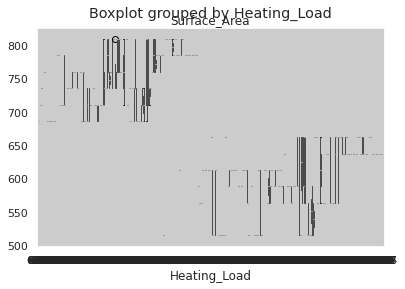

In [ ]:
df1.boxplot(column = 'Surface_Area', by = 'Heating_Load');

[Text(0.5, 1.0, 'Relative Compactness on Cooling Load')]

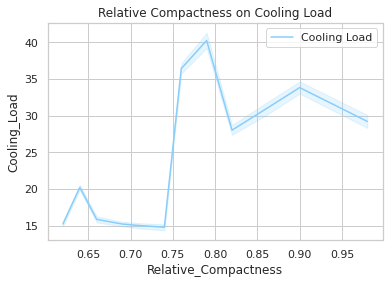

In [ ]:
#sample comparison based on Relative_Compactness

sns.lineplot(
    data=df1,
    x='Relative_Compactness', y="Cooling_Load", label = "Cooling Load",
    markers=True, dashes=False, color = 'lightskyblue'
).set(title='Relative Compactness on Cooling Load')


#Need to research thew meaning
#get insights
#disccuss domain and informations
#meaning of features
#so audience may know the overview.,
#relative compactness research
#potential effects on energy efficiency


[Text(0.5, 1.0, 'Relative Compactness on Heating Load')]

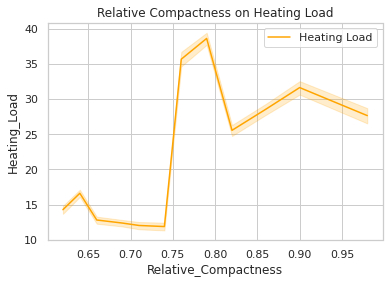

In [ ]:
sns.lineplot(
    data=df1,
    x='Relative_Compactness', y="Heating_Load", color = 'orange', label = "Heating Load",
    markers=True, dashes=False
).set(title='Relative Compactness on Heating Load')

[Text(0.5, 1.0, 'Orientation Effect on Cooling Load')]

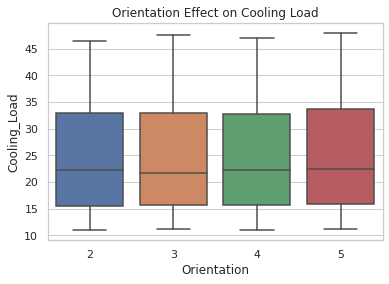

In [ ]:
seaborn.set(style='whitegrid')
seaborn.boxplot(x='Orientation', y='Cooling_Load', data=df1).set(title='Orientation Effect on Cooling Load')

#Orientation effect on Cooling_Load


[Text(0.5, 1.0, 'Orientation Effect on Heating Load')]

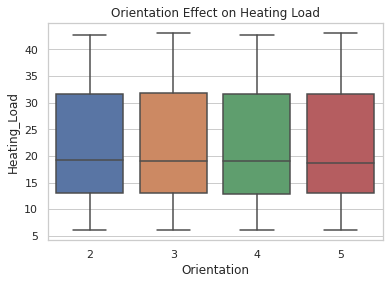

In [ ]:
seaborn.set(style='whitegrid')
seaborn.boxplot(x='Orientation', y='Heating_Load', data=df1).set(title='Orientation Effect on Heating Load')

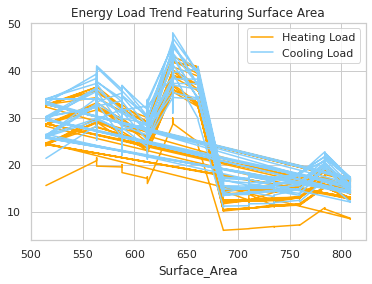

In [ ]:
plt.plot(df1['Surface_Area'], df1['Heating_Load'], label='Heating Load', color = 'orange')
plt.plot(df1['Surface_Area'], df1['Cooling_Load'], label='Cooling Load', color = 'lightskyblue')
plt.legend()
plt.title('Energy Load Trend Featuring Surface Area')
plt.xlabel('Surface_Area')
plt.show()



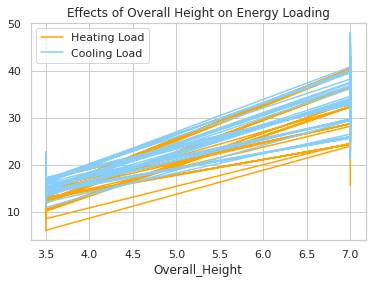

In [ ]:
plt.plot(df1['Overall_Height'], df1['Heating_Load'], label='Heating Load', color = 'orange')
plt.plot(df1['Overall_Height'], df1['Cooling_Load'], label='Cooling Load', color = 'lightskyblue')
plt.legend()
plt.title('Effects of Overall Height on Energy Loading')
plt.xlabel('Overall_Height')
plt.show()


                           Relative_Compactness  Surface_Area     Wall_Area  \
Relative_Compactness               1.000000e+00 -9.919015e-01 -2.037817e-01   
Surface_Area                      -9.919015e-01  1.000000e+00  1.955016e-01   
Wall_Area                         -2.037817e-01  1.955016e-01  1.000000e+00   
Roof_Area                         -8.688234e-01  8.807195e-01 -2.923165e-01   
Overall_Height                     8.277473e-01 -8.581477e-01  2.809757e-01   
Orientation                        4.678592e-17 -3.459372e-17 -2.429499e-17   
Glazing_Area                      -2.960552e-15  3.636925e-15 -8.567455e-17   
Glazing_Area_Distribution         -7.107006e-16  2.438409e-15  2.067384e-16   
Heating_Load                       6.222722e-01 -6.581202e-01  4.556712e-01   
Cooling_Load                       6.343391e-01 -6.729989e-01  4.271170e-01   

                              Roof_Area  Overall_Height   Orientation  \
Relative_Compactness      -8.688234e-01    8.277473e-01  

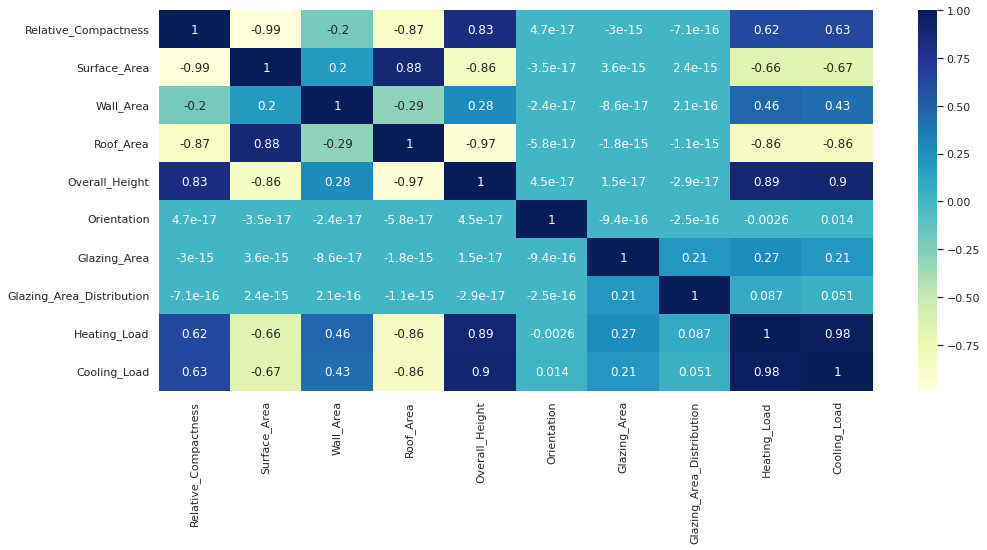

In [ ]:
plt.figure(figsize=(16, 7))

print(df1.corr())

heatmap = sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)


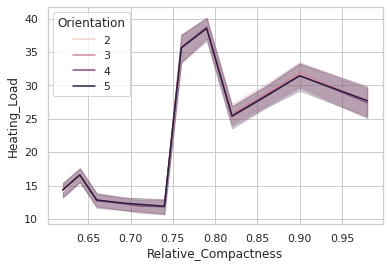

In [ ]:
sns.lineplot(data=df1, x="Relative_Compactness", y="Heating_Load", hue="Orientation")


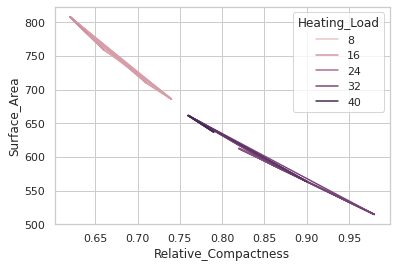

In [ ]:
sns.lineplot(data=df1, x="Relative_Compactness", y="Surface_Area", hue='Heating_Load')

Correlation Check:

Majority of Columns have high correlation.

Strong positive correlation between Heating_Load and Cooling_Load

Strong negative correlation for Relative_Compactness to Surface_Area and Roof_area

High correlation on the values of Relative_Compactness with Heating and Cooliing Load

##CREATING MODEL USING DEEP LEARNING

In [ ]:
# import model selection
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# split X and y
X = df1.drop(['Heating_Load', 'Cooling_Load'], axis=1)
y = df1['Heating_Load']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# instantiate StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [ ]:
scaled_X_train.shape[1]

8

In [ ]:
def plot_history(history, metric=None):
  """plot loss and passed metric.  metric is passed as string and must match 'metric'
  argument in the compile step"""
  fig, axes = plt.subplots(2,1, figsize = (5,10))
  axes[0].plot(history.history['loss'], label = "train")
  axes[0].plot(history.history['val_loss'], label='test')
  axes[0].set_title('Heating Load Prediction Loss')
  axes[0].legend()
  if metric:
    axes[1].plot(history.history[metric], label = 'train')
    axes[1].plot(history.history['val_' + metric], label = 'test')
    axes[1].set_title(metric)
    axes[1].legend()

  plt.show()

In [ ]:
model1 = Sequential()

model1.add(Dense(8, input_dim = scaled_X_train.shape[1],
                activation = 'relu'))

model1.add(Dense(1, activation = 'linear'))

model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model1.fit(scaled_X_train, y_train,
                    validation_data=(scaled_X_test, y_test),
                    epochs=30)

Epoch 1/30
18/18 [==============================] - 1s 15ms/step - loss: 555.6315 - mean_squared_error: 555.6315 - val_loss: 592.3585 - val_mean_squared_error: 592.3585
Epoch 2/30
18/18 [==============================] - 0s 7ms/step - loss: 549.1167 - mean_squared_error: 549.1167 - val_loss: 585.6913 - val_mean_squared_error: 585.6913
Epoch 3/30
18/18 [==============================] - 0s 7ms/step - loss: 542.6461 - mean_squared_error: 542.6461 - val_loss: 579.0148 - val_mean_squared_error: 579.0148
Epoch 4/30
18/18 [==============================] - 0s 11ms/step - loss: 536.0974 - mean_squared_error: 536.0974 - val_loss: 572.2164 - val_mean_squared_error: 572.2164
Epoch 5/30
18/18 [==============================] - 0s 7ms/step - loss: 529.3644 - mean_squared_error: 529.3644 - val_loss: 565.0916 - val_mean_squared_error: 565.0916
Epoch 6/30
18/18 [==============================] - 0s 8ms/step - loss: 522.1988 - mean_squared_error: 522.1988 - val_loss: 557.5307 - val_mean_squared_error:

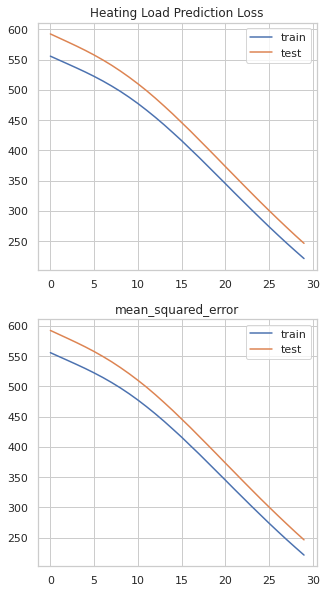

In [ ]:
plot_history(history, metric='mean_squared_error')

In [ ]:
model2 = Sequential()

model2.add(Dense(8, input_dim = scaled_X_train.shape[1],
                activation = 'relu'))

model2.add(Dense(1000, input_dim = scaled_X_train.shape[1],
                activation = 'relu'))

model2.add(Dense(100, input_dim = scaled_X_train.shape[1],
                activation = 'relu'))

model2.add(Dense(1, activation = 'linear'))

model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [ ]:
history = model2.fit(scaled_X_train, y_train,
                    validation_data=(scaled_X_test, y_test),
                    epochs=300)

Epoch 1/300
18/18 [==============================] - 1s 13ms/step - loss: 480.8199 - mean_squared_error: 480.8199 - val_loss: 337.9793 - val_mean_squared_error: 337.9793
Epoch 2/300
18/18 [==============================] - 0s 6ms/step - loss: 146.8524 - mean_squared_error: 146.8524 - val_loss: 62.7792 - val_mean_squared_error: 62.7792
Epoch 3/300
18/18 [==============================] - 0s 6ms/step - loss: 43.3589 - mean_squared_error: 43.3589 - val_loss: 40.4777 - val_mean_squared_error: 40.4777
Epoch 4/300
18/18 [==============================] - 0s 7ms/step - loss: 30.3142 - mean_squared_error: 30.3142 - val_loss: 28.4833 - val_mean_squared_error: 28.4833
Epoch 5/300
18/18 [==============================] - 0s 7ms/step - loss: 24.9524 - mean_squared_error: 24.9524 - val_loss: 26.4450 - val_mean_squared_error: 26.4450
Epoch 6/300
18/18 [==============================] - 0s 6ms/step - loss: 21.7412 - mean_squared_error: 21.7412 - val_loss: 23.4750 - val_mean_squared_error: 23.4750
Epo

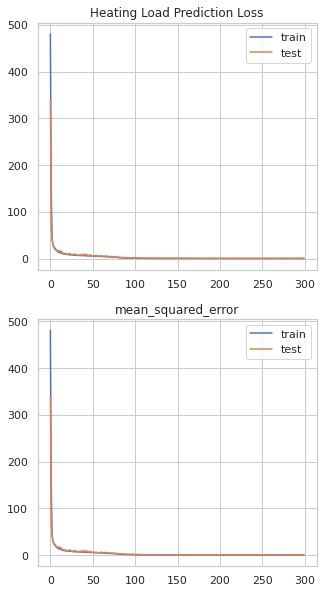

In [ ]:
plot_history(history, metric='mean_squared_error')

In [ ]:
train_preds = model2.predict(scaled_X_train)
test_preds = model2.predict(scaled_X_test)

In [ ]:
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

mae_train = mean_absolute_error(y_train, train_preds)
mae_test = mean_absolute_error(y_test, test_preds)

mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, test_preds)

rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

In [ ]:
print('Heating Load Results')

print('Mean Absolute Error:', round(mae_test, 2))
print('Mean Squared Error:', round(mse_test, 2))
print('RMSE:', round(rmse_test, 2))
print('R-squared scores:', round(r2_test, 2))

Heating Load Results
Mean Absolute Error: 0.75
Mean Squared Error: 0.91
RMSE: 0.96
R-squared scores: 0.99


Cooling Load Model Evaluation

In [ ]:
# split X and y
X = df1.drop(['Cooling_Load', 'Heating_Load'], axis=1)
y = df1['Cooling_Load']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# instantiate StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [ ]:
scaled_X_train.shape[1]

8

In [ ]:
def plot_history(history, metric=None):
  """plot loss and passed metric.  metric is passed as string and must match 'metric'
  argument in the compile step"""
  fig, axes = plt.subplots(2,1, figsize = (5,10))
  axes[0].plot(history.history['loss'], label = "train")
  axes[0].plot(history.history['val_loss'], label='test')
  axes[0].set_title('Cooling Load Prediction Loss')
  axes[0].legend()
  if metric:
    axes[1].plot(history.history[metric], label = 'train')
    axes[1].plot(history.history['val_' + metric], label = 'test')
    axes[1].set_title(metric)
    axes[1].legend()

  plt.show()

In [ ]:
model2 = Sequential()

model2.add(Dense(8, input_dim = scaled_X_train.shape[1],
                activation = 'relu'))

model2.add(Dense(1000, input_dim = scaled_X_train.shape[1],
                activation = 'relu'))

model2.add(Dense(100, input_dim = scaled_X_train.shape[1],
                activation = 'relu'))

model2.add(Dense(1, activation = 'linear'))

model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [ ]:
history = model2.fit(scaled_X_train, y_train,
                    validation_data=(scaled_X_test, y_test),
                    epochs=300)

Epoch 1/300
18/18 [==============================] - 1s 14ms/step - loss: 560.5533 - mean_squared_error: 560.5533 - val_loss: 450.8669 - val_mean_squared_error: 450.8669
Epoch 2/300
18/18 [==============================] - 0s 6ms/step - loss: 308.6016 - mean_squared_error: 308.6016 - val_loss: 208.1154 - val_mean_squared_error: 208.1154
Epoch 3/300
18/18 [==============================] - 0s 6ms/step - loss: 114.5301 - mean_squared_error: 114.5301 - val_loss: 86.3154 - val_mean_squared_error: 86.3154
Epoch 4/300
18/18 [==============================] - 0s 7ms/step - loss: 65.4840 - mean_squared_error: 65.4840 - val_loss: 54.9931 - val_mean_squared_error: 54.9931
Epoch 5/300
18/18 [==============================] - 0s 6ms/step - loss: 40.5916 - mean_squared_error: 40.5916 - val_loss: 34.6154 - val_mean_squared_error: 34.6154
Epoch 6/300
18/18 [==============================] - 0s 6ms/step - loss: 28.6152 - mean_squared_error: 28.6152 - val_loss: 25.0425 - val_mean_squared_error: 25.0425

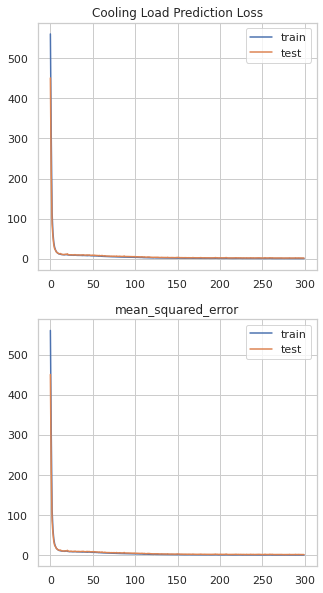

In [ ]:
plot_history(history, metric='mean_squared_error')

In [ ]:
train_preds = model2.predict(scaled_X_train)
test_preds = model2.predict(scaled_X_test)

In [ ]:
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

mae_train = mean_absolute_error(y_train, train_preds)
mae_test = mean_absolute_error(y_test, test_preds)

mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, test_preds)

rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

In [ ]:
print('Cooling Load Results')

print('Mean Absolute Error:', round(mae_test, 2))
print('Mean Squared Error:', round(mse_test, 2))
print('RMSE:', round(rmse_test, 2))
print('R-squared scores:', round(r2_test, 2))

Cooling Load Results
Mean Absolute Error: 0.91
Mean Squared Error: 1.73
RMSE: 1.31
R-squared scores: 0.98


##MODELING THE DATA USING RANDOM FORESTS

HEATING LOAD

In [ ]:
#Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV


In [ ]:
# split X and y
X = df1.drop(['Heating_Load', 'Cooling_Load'], axis=1)
y = df1['Heating_Load']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# instantiate scaler
scaler = StandardScaler()

num_selector = make_column_selector(dtype_include = 'number')


num_pipe = make_pipeline(scaler)

num_tuple = (num_pipe, num_selector)

#column transformer
preprocessor = make_column_transformer(num_tuple)


# fit train
preprocessor.fit(X_train)

# transform features
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
X_train_processed

array([[-0.01778618, -0.13804433,  2.28746313, ..., -0.46644695,
         0.10079722, -0.53588117],
       [-0.20750542,  0.13997502, -1.70692896, ..., -0.46644695,
        -1.02292917, -1.1816292 ],
       [ 0.26679269, -0.41606368,  0.5755808 , ..., -1.37107134,
         0.10079722, -0.53588117],
       ...,
       [-0.49208429,  0.41799437, -1.13630152, ...,  0.43817744,
        -1.02292917,  1.4013629 ],
       [ 2.06912551, -1.80616042, -0.56567408, ...,  1.34280183,
         0.10079722,  0.75561488],
       [ 1.31024853, -1.25012172,  0.00495336, ...,  0.43817744,
        -1.02292917, -0.53588117]])

In [ ]:
rf = RandomForestRegressor(random_state = 42)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf.fit(X_train_processed, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
rf.predict(X_test_processed)

array([15.581 , 13.153 , 32.7919, 42.0497, 16.8067, 23.2804, 24.3299,
       28.6002, 19.3115, 29.0383, 18.6241, 33.1423, 28.7537, 10.292 ,
       18.3847, 36.6417, 36.0647, 12.1313, 14.534 , 33.0996, 29.243 ,
       42.1015, 11.5848, 36.5592, 15.1681, 36.5734, 35.6324, 28.8031,
       17.3681, 14.1749, 10.3431, 12.3244, 16.8028, 27.0408, 36.0039,
       28.294 , 32.6758, 36.3976, 35.4161, 10.5782, 28.3189, 12.1544,
        6.4433, 32.2184,  6.7921,  6.4385,  7.1481, 10.6765, 29.3138,
       32.8605, 35.0564, 12.88  , 12.8508, 38.6456, 12.2152, 15.1927,
       12.2286, 25.3348, 39.4874, 36.3755, 14.013 , 15.5781, 12.8456,
       23.831 , 28.6105, 36.6531, 36.799 , 11.6127, 12.9468, 11.9971,
       29.3904, 32.7632, 12.4341, 23.6579, 32.1675, 12.1876, 29.4344,
       25.6732, 32.5465, 19.1586, 24.3303, 39.1556, 10.5977, 14.298 ,
       11.5028, 13.1211, 25.9851, 36.6312, 36.2573, 17.4327, 15.3109,
       25.4944, 11.2014, 12.9746, 36.0517, 12.7949, 26.4654, 29.1348,
       10.7251, 10.6

In [ ]:
rf_train_score = rf.score(X_train_processed, y_train)
rf_test_score = rf.score(X_test_processed, y_test)
print(rf_train_score)
print(rf_test_score)

0.9996433116851706
0.9978627515204264


In [ ]:
train_preds = rf.predict(scaled_X_train)
test_preds = rf.predict(scaled_X_test)

In [ ]:
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

mae_train = mean_absolute_error(y_train, train_preds)
mae_test = mean_absolute_error(y_test, test_preds)

mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, test_preds)

rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

In [ ]:
print('Heating Load Results')

print('Mean Absolute Error:', round(mae_test, 2))
print('Mean Squared Error:', round(mse_test, 2))
print('RMSE:', round(rmse_test, 2))
print('R-squared scores:', round(r2_test, 2))

Heating Load Results
Mean Absolute Error: 0.35
Mean Squared Error: 0.23
RMSE: 0.48
R-squared scores: 1.0


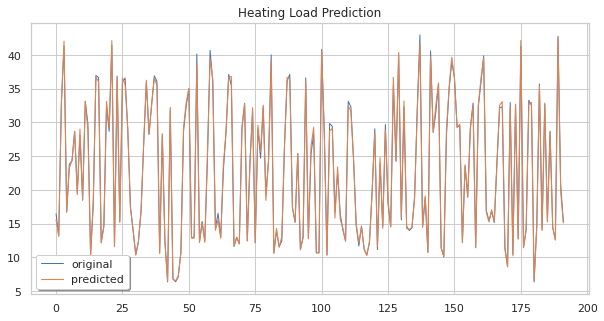

In [ ]:
x_ax = range(len(y_test))
plt.figure(figsize=(10,5))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, test_preds, linewidth=1.1, label="predicted")
plt.title("Heating Load Prediction")
#plt.xlabel('X-axis')
#plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

COOLING LOAD

In [ ]:
# split X and y
X = df1.drop(['Cooling_Load', 'Heating_Load'], axis=1)
y = df1['Cooling_Load']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# instantiate scaler
scaler = StandardScaler()

num_selector = make_column_selector(dtype_include = 'number')


num_pipe = make_pipeline(scaler)

num_tuple = (num_pipe, num_selector)

#column transformer
preprocessor = make_column_transformer(num_tuple)


# fit train
preprocessor.fit(X_train)

# transform features
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
rf = RandomForestRegressor(random_state = 42)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf.fit(X_train_processed, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
rf.predict(X_test_processed)

array([17.0197, 16.0288, 33.3414, 45.3946, 19.9811, 27.6457, 26.0496,
       29.5841, 22.403 , 32.4838, 21.948 , 34.0929, 32.6638, 13.4622,
       20.7217, 37.2795, 36.1582, 14.9122, 16.7359, 34.1452, 29.7603,
       42.961 , 14.2745, 37.9936, 19.2499, 36.8263, 36.4041, 31.6521,
       21.0713, 15.0993, 13.4722, 15.0697, 20.1586, 28.0089, 38.6441,
       29.9921, 33.8199, 33.9372, 36.1659, 14.0067, 30.0681, 14.6644,
       11.6564, 32.4913, 11.7842, 11.7532, 12.4017, 14.0455, 31.1739,
       33.1865, 35.3736, 15.7709, 16.2141, 43.594 , 14.8319, 19.2797,
       15.0497, 27.1431, 39.0587, 37.2847, 16.0656, 16.968 , 15.9298,
       25.6237, 30.3512, 39.4745, 40.03  , 14.1942, 14.1213, 14.6898,
       29.7702, 32.9974, 15.2002, 26.6708, 33.6434, 14.9273, 30.2849,
       27.4582, 33.5483, 23.6348, 25.7408, 41.1151, 13.8556, 15.1623,
       13.7831, 15.6181, 29.9746, 37.1774, 34.8396, 21.0708, 19.2559,
       27.3526, 14.0377, 15.6137, 37.1974, 15.982 , 28.7066, 31.1026,
       14.0895, 13.9

In [ ]:
rf_train_score = rf.score(X_train_processed, y_train)
rf_test_score = rf.score(X_test_processed, y_test)
print(rf_train_score)
print(rf_test_score)

0.9950692944309362
0.9685605816852328


In [ ]:
train_preds = rf.predict(scaled_X_train)
test_preds = rf.predict(scaled_X_test)

In [ ]:
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

mae_train = mean_absolute_error(y_train, train_preds)
mae_test = mean_absolute_error(y_test, test_preds)

mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, test_preds)

rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

In [ ]:
print('Cooling Load Results')

print('Mean Absolute Error:', round(mae_test, 2))
print('Mean Squared Error:', round(mse_test, 2))
print('RMSE:', round(rmse_test, 2))
print('R-squared scores:', round(r2_test, 2))

Cooling Load Results
Mean Absolute Error: 1.03
Mean Squared Error: 2.85
RMSE: 1.69
R-squared scores: 0.97


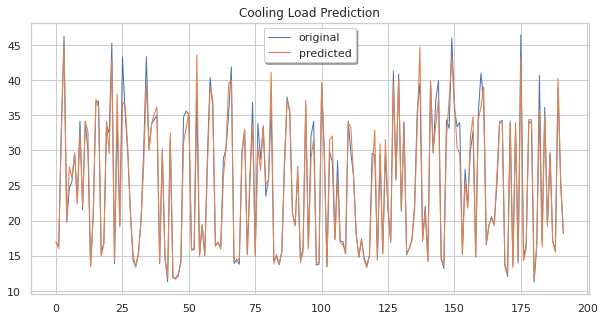

In [ ]:
x_ax = range(len(y_test))
plt.figure(figsize=(10,5))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, test_preds, linewidth=1.1, label="predicted")
plt.title("Cooling Load Prediction")
#plt.xlabel('X-axis')
#plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
param_grid = {
    'n_estimators' : [1000],
    'min_samples_split' : [2],
    'min_samples_leaf' : [1]
}
clf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = 1)
clf_pipe = make_pipeline(preprocessor, clf)
clf_pipe.fit(X_train, y_train)
train_preds = clf_pipe.predict(X_train)
test_preds = clf_pipe.predict(X_test)

In [ ]:
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

mae_train = mean_absolute_error(y_train, train_preds)
mae_test = mean_absolute_error(y_test, test_preds)

mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, test_preds)

rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

In [ ]:
print('Cooling Load Results')

print('Mean Absolute Error:', round(mae_test, 2))
print('Mean Squared Error:', round(mse_test, 2))
print('RMSE:', round(rmse_test, 2))
print('R-squared scores:', round(r2_test, 2))

Cooling Load Results
Mean Absolute Error: 1.01
Mean Squared Error: 2.82
RMSE: 1.68
R-squared scores: 0.97


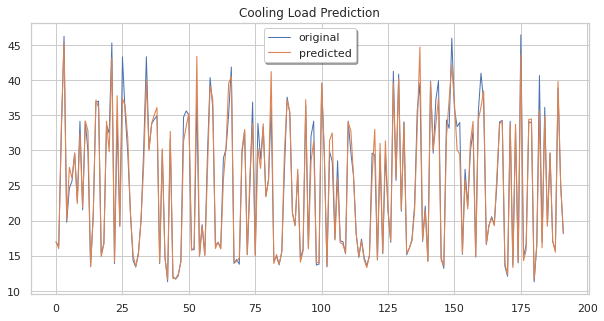

In [ ]:
x_ax = range(len(y_test))
plt.figure(figsize=(10,5))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, test_preds, linewidth=1.1, label="predicted")
plt.title("Cooling Load Prediction")
#plt.xlabel('X-axis')
#plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

##Checking Correlations with best Models

In [ ]:
# split X and y
X = df1.drop(['Cooling_Load', 'Heating_Load', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution'], axis=1)
y = df1['Cooling_Load']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# instantiate StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [ ]:
def plot_history(history, metric=None):
  """plot loss and passed metric.  metric is passed as string and must match 'metric'
  argument in the compile step"""
  fig, axes = plt.subplots(2,1, figsize = (5,10))
  axes[0].plot(history.history['loss'], label = "train")
  axes[0].plot(history.history['val_loss'], label='test')
  axes[0].set_title('Cooling Load Prediction Loss - Correlated Features')
  axes[0].legend()
  if metric:
    axes[1].plot(history.history[metric], label = 'train')
    axes[1].plot(history.history['val_' + metric], label = 'test')
    axes[1].set_title(metric)
    axes[1].legend()

  plt.show()

In [ ]:
model2 = Sequential()

model2.add(Dense(8, input_dim = scaled_X_train.shape[1],
                activation = 'relu'))

model2.add(Dense(1000, input_dim = scaled_X_train.shape[1],
                activation = 'relu'))

model2.add(Dense(100, input_dim = scaled_X_train.shape[1],
                activation = 'relu'))

model2.add(Dense(1, activation = 'linear'))

model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [ ]:
history = model2.fit(scaled_X_train, y_train,
                    validation_data=(scaled_X_test, y_test),
                    epochs=300)

Epoch 1/300
18/18 [==============================] - 1s 24ms/step - loss: 510.0082 - mean_squared_error: 510.0082 - val_loss: 306.7666 - val_mean_squared_error: 306.7666
Epoch 2/300
18/18 [==============================] - 0s 9ms/step - loss: 130.7623 - mean_squared_error: 130.7623 - val_loss: 69.2176 - val_mean_squared_error: 69.2176
Epoch 3/300
18/18 [==============================] - 0s 10ms/step - loss: 48.7193 - mean_squared_error: 48.7193 - val_loss: 47.5113 - val_mean_squared_error: 47.5113
Epoch 4/300
18/18 [==============================] - 0s 10ms/step - loss: 33.2042 - mean_squared_error: 33.2042 - val_loss: 34.3478 - val_mean_squared_error: 34.3478
Epoch 5/300
18/18 [==============================] - 0s 8ms/step - loss: 27.0284 - mean_squared_error: 27.0284 - val_loss: 33.5810 - val_mean_squared_error: 33.5810
Epoch 6/300
18/18 [==============================] - 0s 9ms/step - loss: 23.7220 - mean_squared_error: 23.7220 - val_loss: 27.7899 - val_mean_squared_error: 27.7899
E

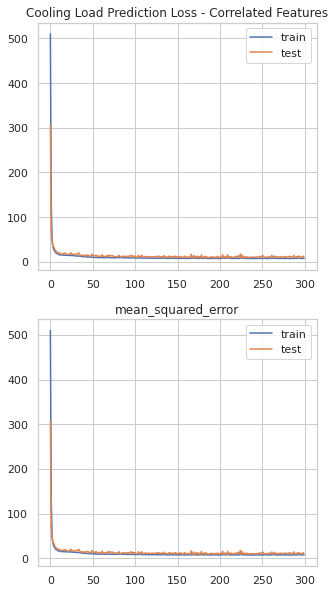

In [ ]:
plot_history(history, metric='mean_squared_error')

In [ ]:
train_preds = model2.predict(scaled_X_train)
test_preds = model2.predict(scaled_X_test)

In [ ]:
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

mae_train = mean_absolute_error(y_train, train_preds)
mae_test = mean_absolute_error(y_test, test_preds)

mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, test_preds)

rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

In [ ]:
print('Cooling Load Results - Correlated Features')

print('Mean Absolute Error:', round(mae_test, 2))
print('Mean Squared Error:', round(mse_test, 2))
print('RMSE:', round(rmse_test, 2))
print('R-squared scores:', round(r2_test, 2))

Cooling Load Results - Correlated Features
Mean Absolute Error: 2.45
Mean Squared Error: 9.95
RMSE: 3.15
R-squared scores: 0.89


Heating Load correlation check with random forest

In [ ]:
# split X and y
X = df1.drop(['Heating_Load', 'Cooling_Load', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution'], axis=1)
y = df1['Heating_Load']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# instantiate scaler
scaler = StandardScaler()

num_selector = make_column_selector(dtype_include = 'number')


num_pipe = make_pipeline(scaler)

num_tuple = (num_pipe, num_selector)

#column transformer
preprocessor = make_column_transformer(num_tuple)


# fit train
preprocessor.fit(X_train)

# transform features
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
rf = RandomForestRegressor(random_state = 42)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf.fit(X_train_processed, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
rf_train_score = rf.score(X_train_processed, y_train)
rf_test_score = rf.score(X_test_processed, y_test)
print(rf_train_score)
print(rf_test_score)

0.9075727461993318
0.9090169313643881


In [ ]:
train_preds = rf.predict(scaled_X_train)
test_preds = rf.predict(scaled_X_test)

In [ ]:
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

mae_train = mean_absolute_error(y_train, train_preds)
mae_test = mean_absolute_error(y_test, test_preds)

mse_train = mean_squared_error(y_train, train_preds)
mse_test = mean_squared_error(y_test, test_preds)

rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

In [ ]:
print('Heating Load Results - Correlated Features')

print('Mean Absolute Error:', round(mae_test, 2))
print('Mean Squared Error:', round(mse_test, 2))
print('RMSE:', round(rmse_test, 2))
print('R-squared scores:', round(r2_test, 2))

Heating Load Results - Correlated Features
Mean Absolute Error: 2.29
Mean Squared Error: 9.56
RMSE: 3.09
R-squared scores: 0.91


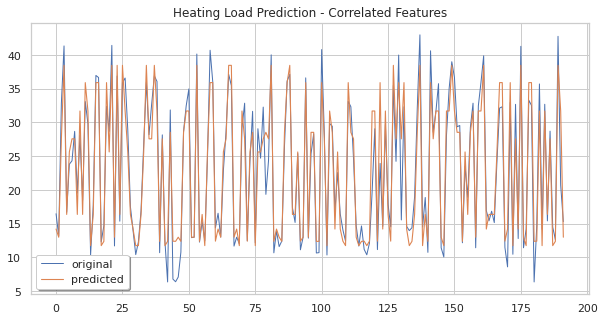

In [ ]:
x_ax = range(len(y_test))
plt.figure(figsize=(10,5))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, test_preds, linewidth=1.1, label="predicted")
plt.title("Heating Load Prediction - Correlated Features")
#plt.xlabel('X-axis')
#plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()